# **Ejercicios Scikit-Learn**:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets

## **1- En clase hemos visto que existen técnicas de escalado de los datos de entrada (estandarización, minmaxscaler...) razona cuáles de los siguientes algoritmos se podrían beneficiar de alguna de estas técnicas:**

### Decision Trees:

In [ ]:
Le da igual

### K-Nearest Neighbors:

In [ ]:
Relevante

### Support Vector Machines:

Relevante

### Random Forest:

le da igual

### Regresión lineal/polinómica:

relevante

### Principal Component Analysis:

## **2- De manera similar, ¿cuándo puede ser lógico escoger entre *One-Hot Encoding* (vectores tipo [0,1,0] para cada etiqueta) vs *label encoding normal* (cada etiqueta un número entero ordenado):**

## **3- Resuelve el dataset 'digits' de SKLEARN:**

In [2]:
# Cargamos el dataset de digitos:
digitos = datasets.load_digits()

In [3]:
digitos.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
print(digitos.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [7]:
print(digitos.target.shape)

(1797,)


In [10]:
digitos.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [9]:
digitos.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

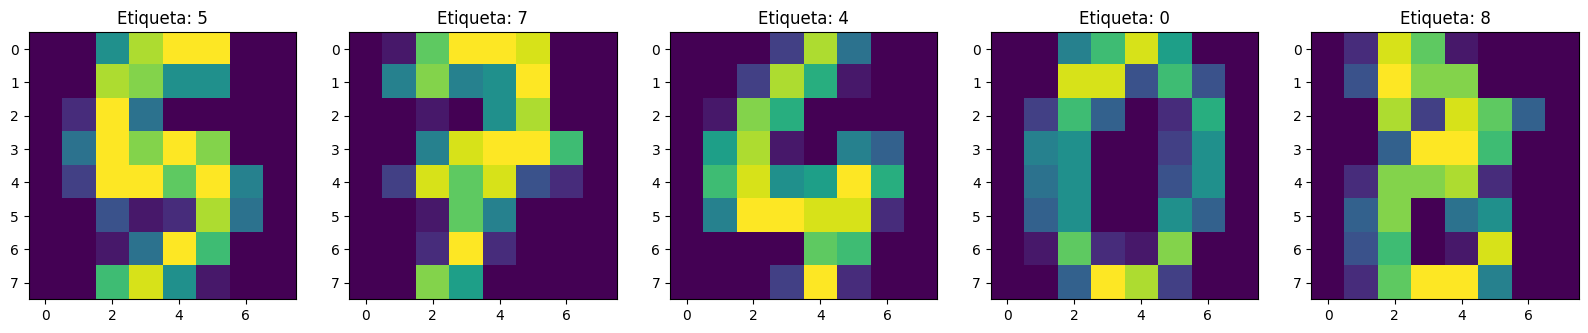

In [8]:
n_imagenes = 5

plt.figure(figsize=(20,4))

for imagen in range(n_imagenes):
    plt.subplot(1, n_imagenes, imagen+1)
    imagen_rand = np.random.randint(0, digitos.images.shape[0])
    plt.imshow(digitos.images[imagen_rand])
    plt.title(f'Etiqueta: {digitos.target[imagen_rand]}')
plt.show()
    

In [17]:
pd.Series(digitos.target).value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = digitos.data
y = digitos.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.45)

In [14]:
k_vecinos = KNeighborsClassifier(n_neighbors=95)

k_vecinos.fit(X_train, y_train)

k_vecinos.score(X_test, y_test)

0.896168108776267

In [11]:
num_vecinos = np.geomspace(2, 200, 12).astype(int)
num_vecinos

array([  2,   3,   4,   7,  10,  16,  24,  37,  56,  86, 131, 200])

In [16]:
for vecino in num_vecinos:
    k_vecinos = KNeighborsClassifier(n_neighbors=vecino)
    k_vecinos.fit(X_train, y_train)
    print(f'Para {vecino} vecinos. Precisión = {k_vecinos.score(X_test, y_test)}')

Para 2 vecinos. Precisión = 0.9765142150803461
Para 3 vecinos. Precisión = 0.9826946847960445
Para 4 vecinos. Precisión = 0.9765142150803461
Para 7 vecinos. Precisión = 0.9765142150803461
Para 10 vecinos. Precisión = 0.9703337453646477
Para 16 vecinos. Precisión = 0.9629171817058096
Para 24 vecinos. Precisión = 0.9567367119901112
Para 37 vecinos. Precisión = 0.9468479604449939
Para 56 vecinos. Precisión = 0.9221260815822002
Para 86 vecinos. Precisión = 0.8974042027194067
Para 131 vecinos. Precisión = 0.8788627935723115
Para 200 vecinos. Precisión = 0.8479604449938195


In [17]:
from sklearn.model_selection import RandomizedSearchCV

parametros = {'n_neighbors': num_vecinos}

modelo = KNeighborsClassifier()

busqueda = RandomizedSearchCV(modelo, parametros, n_iter = 12, cv=5, n_jobs = -1)

busqueda.fit(X_train, y_train)

busqueda.best_params_

{'n_neighbors': 3}

In [19]:
busqueda.best_estimator_.predict()

KNeighborsClassifier(n_neighbors=3)

## **CALIDAD EN PURIFICACIÓN DE MENA DE HIERRO**:

Dataset **REAL** del proceso industrial de purificación de la mena de hierro. El objetivo es predecir la última columna a partir de los datos anteriores.

Como dataset real, los datos pueden tener problemáticas varias tanto desde el aspecto de las frecuencias de medición temporal como de los propios datos recogidos. El preprocesado es clave.

Descargad el dataset aquí:

https://we.tl/t-nCbsErRlAE

In [2]:
import numpy as np

In [3]:
# Si guardáis los datos en el mismo directorio que el notebook, podéis cargarlos así:
np.load('./mining_quality.npy',allow_pickle='TRUE').item()

{'DESCR': '\n\nThe main goal is to use this data to predict how much impurity is in the ore concentrate. As this impurity is measured every hour, if we can predict how much silica (impurity) is in the ore concentrate, we can help the engineers, giving them early information to take actions (empowering!). Hence, they will be able to take corrective actions in advance (reduce impurity, if it is the case) and also help the environment (reducing the amount of ore that goes to tailings as you reduce silica in the ore concentrate).\n\nContent\nThe first column shows time and date range (from march of 2017 until september of 2017). Some columns were sampled every 20 second. Others were sampled on a hourly base.\n\nThe second and third columns are quality measures of the iron ore pulp right before it is fed into the flotation plant. Column 4 until column 8 are the most important variables that impact in the ore quality in the end of the process. From column 9 until column 22, we can see proces